Matplotlib is ready!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


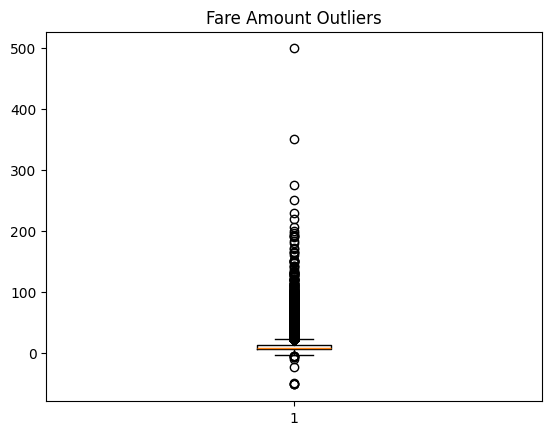

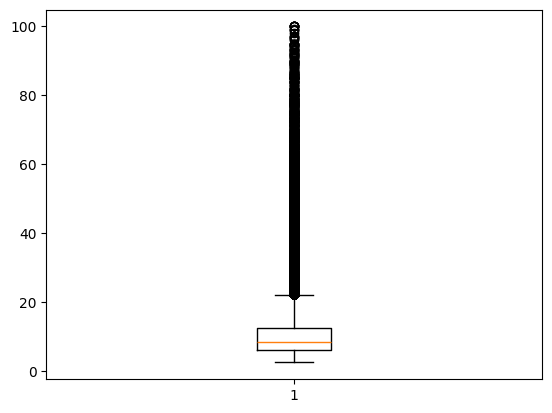

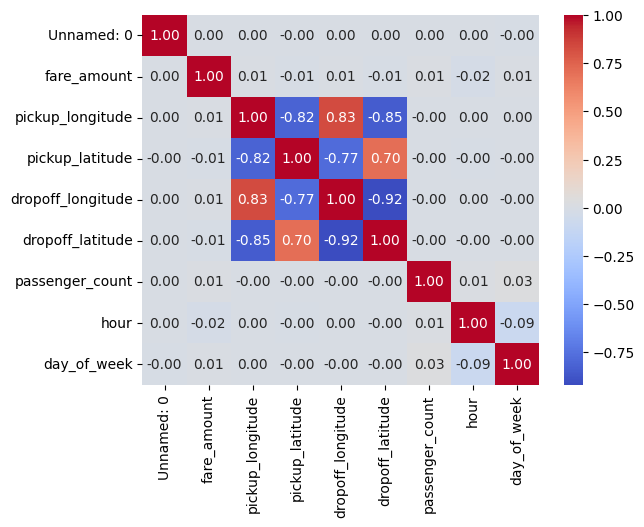

Linear Regression:
R2 Score: 0.0005848940576090866
RMSE: 9.326943127793808

Random Forest Regression:
R2 Score: 0.8041751594106136
RMSE: 4.128575820442597

Random Forest performs better.


In [2]:
!pip install pandas numpy seaborn scikit-learn matplot

print('Matplotlib is ready!')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Note: You must change this file path to match where 'uber.csv' is located on your computer.
df = pd.read_csv(r"C:\Users\SarthakPatil\Downloads\uber.csv")
df.head()

df.shape

df.info()

df.columns

df.describe()

#Data Preprocessing
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df.dropna(inplace=True)

#Feature Engineering
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

plt.boxplot(df['fare_amount'])
plt.title('Fare Amount Outliers')
plt.show()

# Remove outliers for fare_amount
df = df[(df['fare_amount'] >= 2) & (df['fare_amount'] <= 100)]

plt.boxplot(df['fare_amount'])
plt.show()

correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

features = [
    'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude',
    'passenger_count', 'hour', 'day_of_week'
]
X = df[features]
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Model 2: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Models
print("Linear Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print("\nRandom Forest Regression:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Compare Models
if r2_score(y_test, y_pred_rf) > r2_score(y_test, y_pred_lr):
    print("\nRandom Forest performs better.")
else:
    print("\nLinear Regression performs better.")